# Path of SingleMuon Dataset
 
- [CMS OMS displaying](https://cmsoms.cern.ch/cms/triggers/hlt_trigger_rates?cms_run=315721&props.11280_11278.selectedCells=Physics:2)
- [HLT Path Configuration](https://hlt-config-editor-confdbv3.app.cern.ch/open?cfg=%2Fcdaq%2Fphysics%2FRun2018%2F2e34%2Fv1.2.3%2FHLT%2FV2&db=online)

In [1]:
from omsapi import OMSAPI
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
omsapi = OMSAPI(api_url="https://vocms0185.cern.ch/agg/api", api_version="v1", cert_verify=False)
omsapi.auth_oidc("oms-api-client", "4577f6da-bbf7-4f5e-a898-f8db325e7e5e", audience="cmsoms-int-0185")

## SingleMuon Dataset Fetching

In [3]:
dataset_name='SingleMuon'
q_dataset=omsapi.query("datasetrates").paginate(page=1,per_page=1000).filter("run_number",315721).filter("dataset_name",dataset_name)
response_dataset=q_dataset.data()
folded_json_dataset=response_dataset.json()

https://vocms0185.cern.ch/agg/api/v1/datasetrates/?filter[run_number][EQ]=315721&filter[dataset_name][EQ]=SingleMuon&page[offset]=0&page[limit]=1000


In [4]:
df_singlemuon=pd.json_normalize(folded_json_dataset['data'])
df_singlemuon.set_index('attributes.first_lumisection_number',inplace=True)
df_singlemuon=df_singlemuon[23:628]
df_singlemuon
#df_singlemuon=df_singlemuon[df_singlemuon["attributes.first_lumisection_number"]>33]
#df_singlemuon=df_singlemuon[df_singlemuon["attributes.first_lumisection_number"]<638].reset_index()

id          type  \
attributes.first_lumisection_number                                          
33                                    315721__SingleMuon__33  datasetrates   
34                                    315721__SingleMuon__34  datasetrates   
35                                    315721__SingleMuon__35  datasetrates   
36                                    315721__SingleMuon__36  datasetrates   
37                                    315721__SingleMuon__37  datasetrates   
...                                                      ...           ...   
634                                  315721__SingleMuon__634  datasetrates   
635                                  315721__SingleMuon__635  datasetrates   
636                                  315721__SingleMuon__636  datasetrates   
637                                  315721__SingleMuon__637  datasetrates   
638                                  315721__SingleMuon__638  datasetrates   

                                    attributes.start_time  \
attributes.first_lumisection_number                         
33                                   2018-05-05T05:08:13Z   
34                                   2018-05-05T05:08:37Z   
35                                   2018-05-05T05:09:00Z   
36                                   2018-05-05T05:09:23Z   
37                                   2018-05-05T05:09:47Z   
...                                                   ...   
634                                  2018-05-05T09:01:43Z   
635                                  2018-05-05T09:02:06Z   
636                                  2018-05-05T09:02:30Z   
637                                  2018-05-05T09:02:53Z   
638                                  2018-05-05T09:03:16Z   

                                     attributes.last_lumisection_number  \
attributes.first_lumisection_number                                       
33                                                                   33   
34                                                                   34   
35                                                                   35   
36                                                                   36   
37                                                                   37   
...                                                                 ...   
634                                                                 634   
635                                                                 635   
636                                                                 636   
637                                                                 637   
638                                                                 638   

                                     attributes.rate  attributes.run_number  \
attributes.first_lumisection_number                                           
33                                        120.632801                 315721   
34                                        294.632318                 315721   
35                                        347.141048                 315721   
36                                        123.936046                 315721   
37                                         77.261620                 315721   
...                                              ...                    ...   
634                                         0.000000                 315721   
635                                         0.042899                 315721   
636                                         0.000000                 315721   
637                                         0.042899                 315721   
638                                         0.042899                 315721   

                                     attributes.last_lumisection_in_run  \
attributes.first_lumisection_number                                       
33                                                                  640   
34                  

### PATH HLT Fetching

In [11]:
df_singlemuon_dict={}
path_name_list=['HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10',
                'HLT_IsoMu20_eta2p1_LooseChargedIsoPFTau27_eta2p1_CrossL1_v10',
                'HLT_IsoMu20_v13',
                'HLT_IsoMu24_eta2p1_v13',
                'HLT_IsoMu24_v11',
                'HLT_IsoMu27_v14',
                #'HLT_IsoMu30_v2',
                #'HLT_L1SingleMu18_v3',
                #'HLT_L1SingleMu25_v2',
                #'HLT_L2Mu10_v7',
                #'HLT_L2Mu50_v2',
                'HLT_Mu10_TrkIsoVVL_DiPFJet40_DEta3p5_MJJ750_HTT350_PFMETNoMu60_v12']
for i in path_name_list : 
    q = omsapi.query("hltpathrates").paginate(page=1, per_page=1000).filter("run_number",315721).filter("path_name",i)
    response=q.data()
    folded_json=response.json()
    df=pd.json_normalize(folded_json['data'])
    df.set_index('attributes.first_lumisection_number',inplace=True)
    df=df[23:628]
    df_singlemuon_dict[i]=df
    

https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_TightChargedIsoPFTau27_eta2p1_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_TightID_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_MediumChargedIsoPFTau27_eta2p1_CrossL1_v10&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_IsoMu20_eta2p1_LooseChargedIsoPFTauHPS27_eta2p1_CrossL1_v1&page[offset]=0&page[limit]=1000


### Data Display


(-10.0, 700.0)

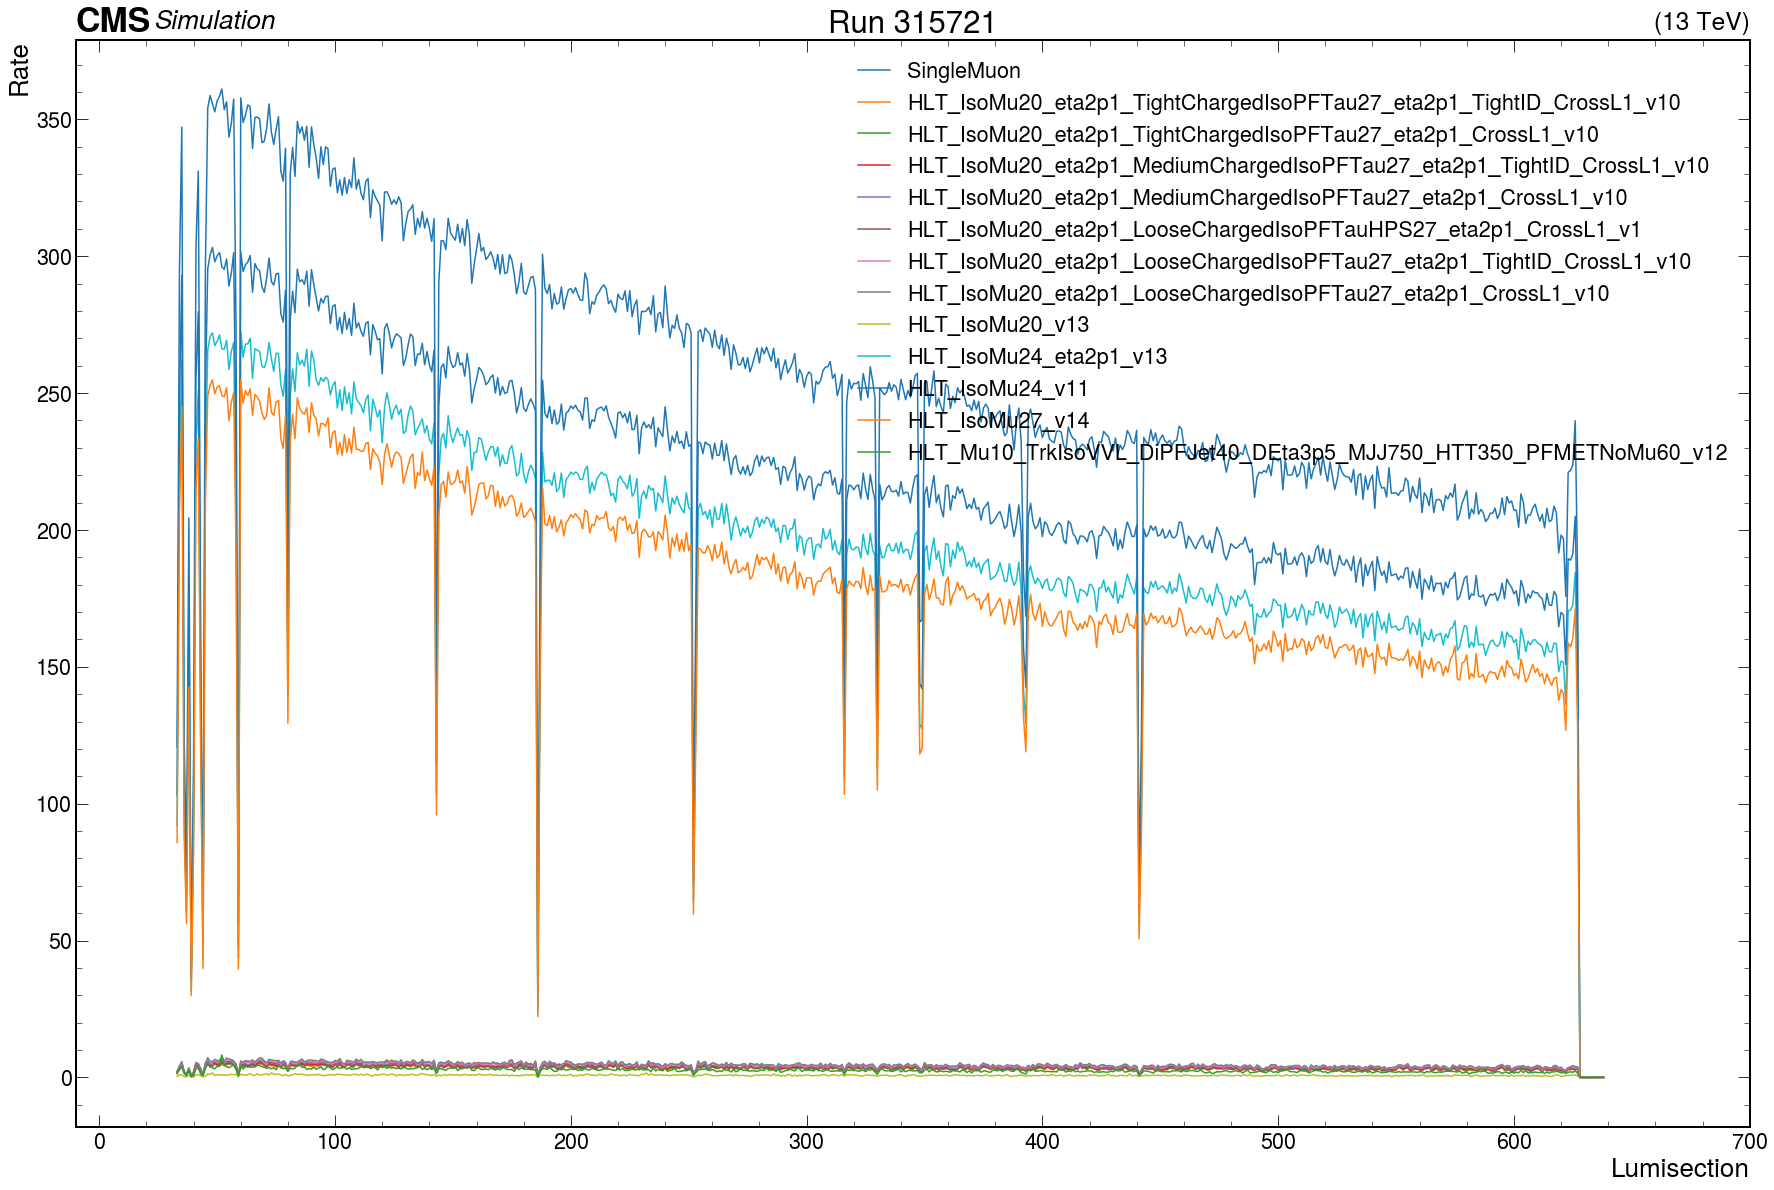

In [12]:
plt.style.use([hep.style.ROOT,hep.style.firamath])
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
plt.plot(df_singlemuon["attributes.rate"],label='SingleMuon')
for i in path_name_list:
    plt.plot(df_singlemuon_dict[i]["attributes.rate"],label=df_singlemuon_dict[i]['attributes.path_name'][33])
plt.title("Run 315721")
plt.legend()
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.xlim(-10,700)

(-10.0, 700.0)

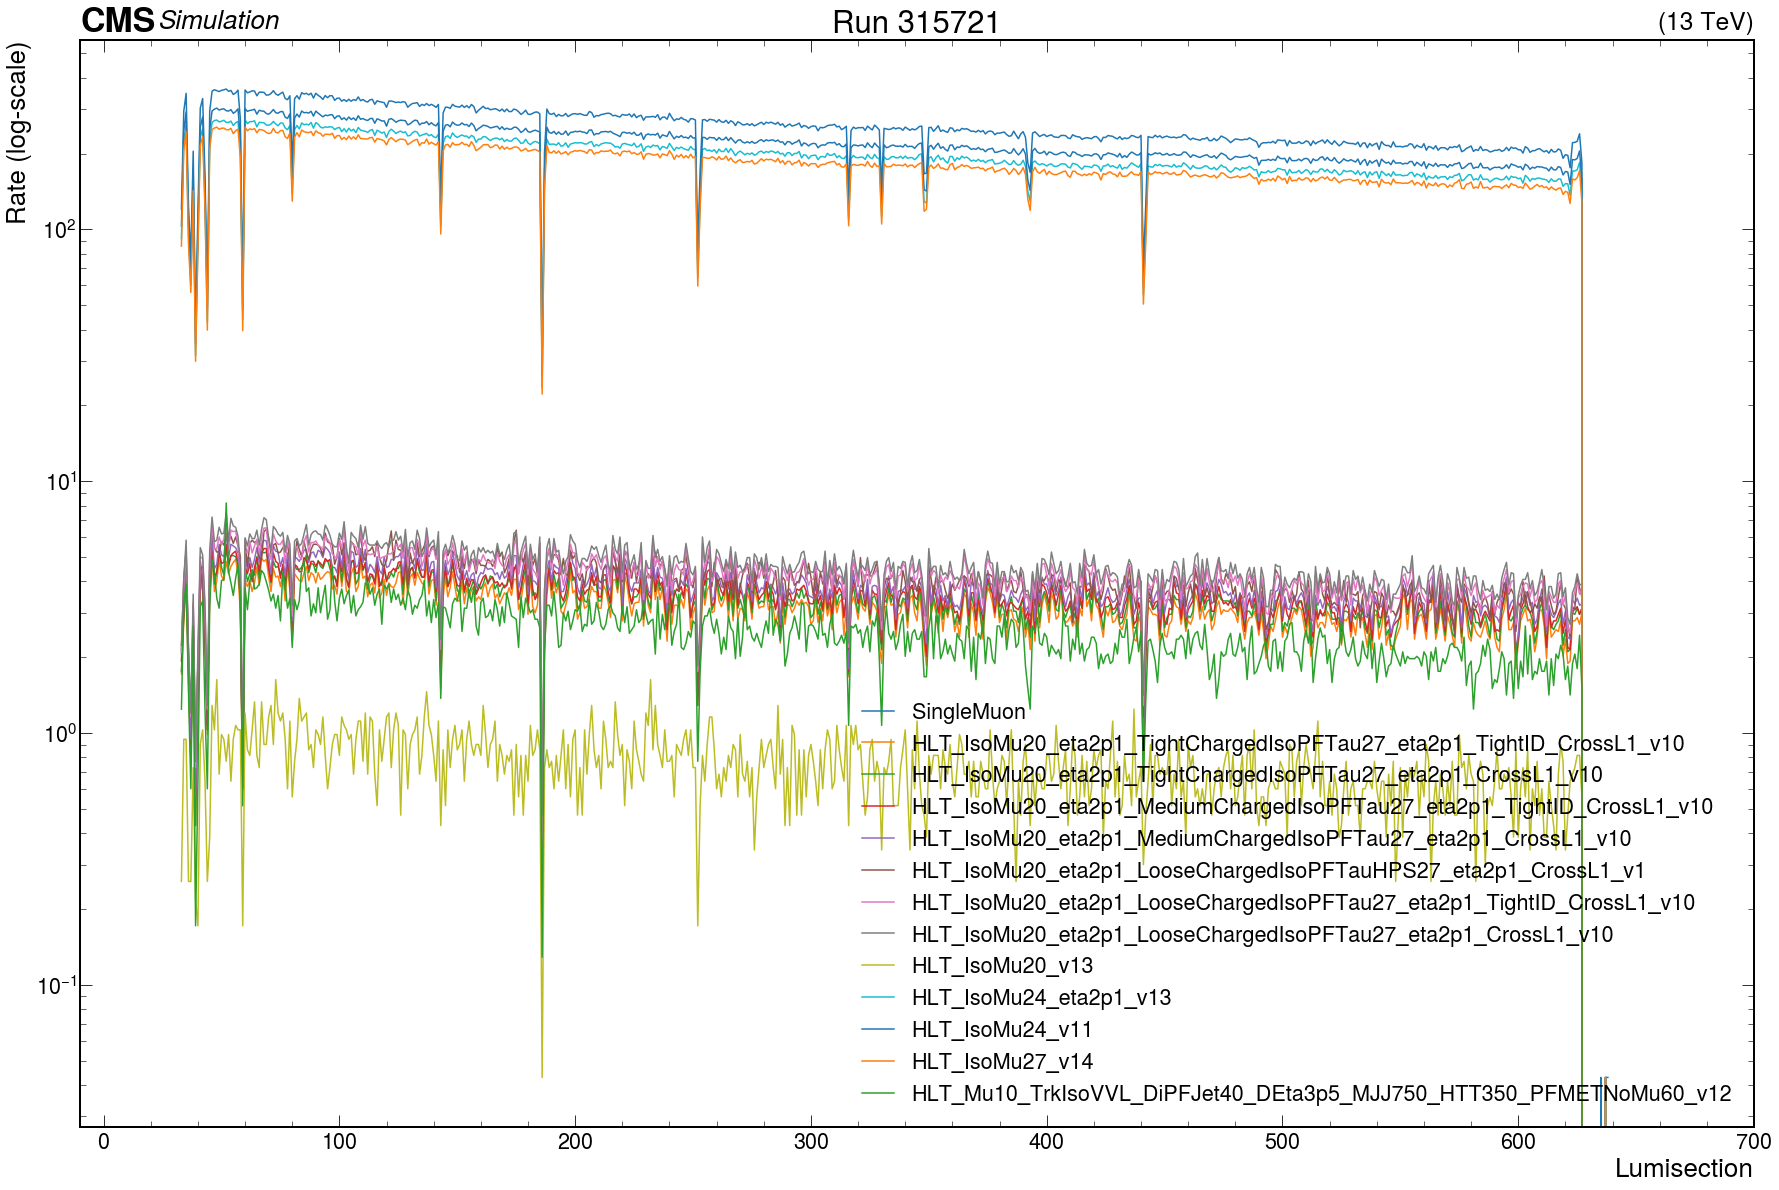

In [13]:
plt.style.use([hep.style.ROOT,hep.style.firamath])
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
plt.plot(df_singlemuon["attributes.rate"],label='SingleMuon')
for i in path_name_list:
    plt.plot(df_singlemuon_dict[i]["attributes.rate"],label=df_singlemuon_dict[i]['attributes.path_name'][33])
plt.yscale('log')
plt.title("Run 315721")
plt.legend()
plt.xlabel('Lumisection')
plt.ylabel('Rate (log-scale)')
plt.xlim(-10,700)

(-10.0, 700.0)

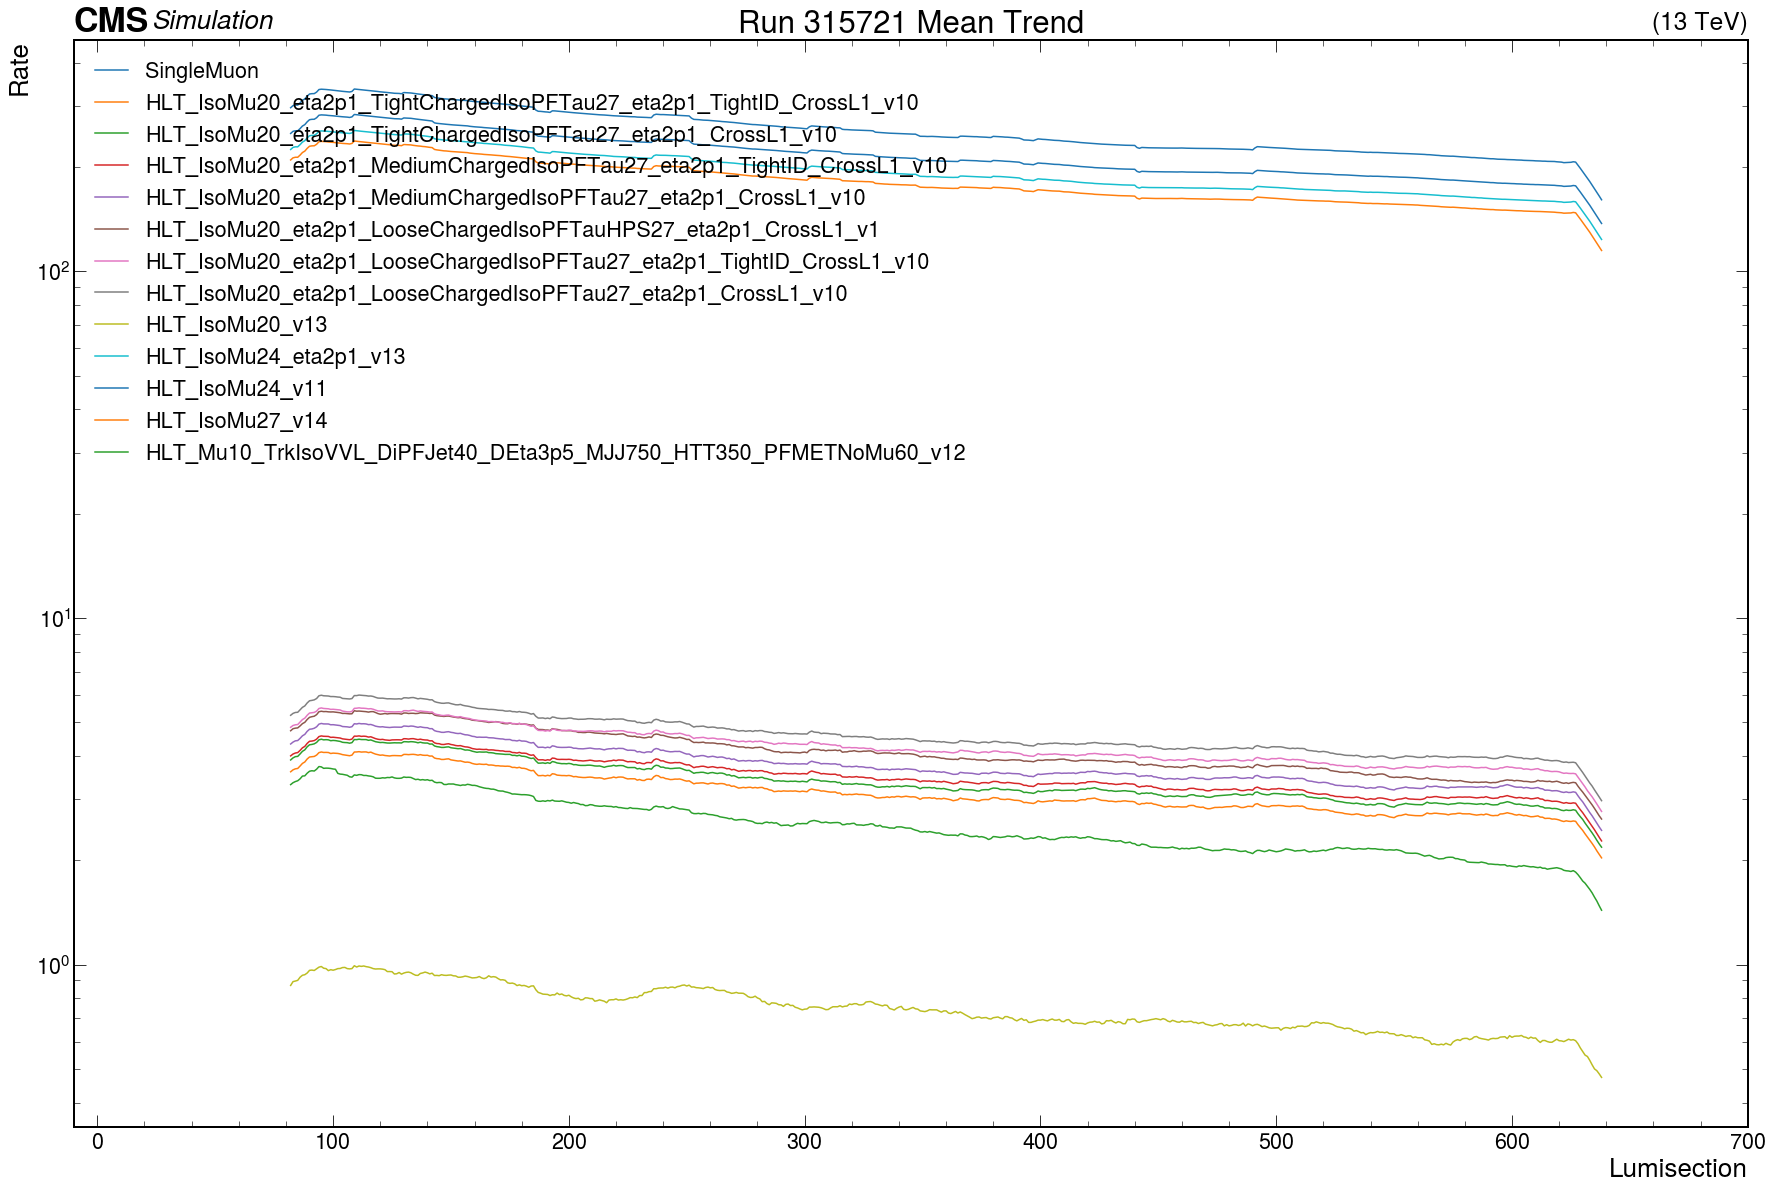

In [14]:
plt.style.use([hep.style.ROOT,hep.style.firamath])
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
plt.plot(df_singlemuon["attributes.rate"].rolling(window=50).mean(),label='SingleMuon')
for i in df_singlemuon_dict.keys():
    plt.plot(df_singlemuon_dict[i]["attributes.rate"].rolling(window=50).mean(),label=df_singlemuon_dict[i]['attributes.path_name'][33])
plt.yscale('log')
plt.title("Run 315721 Mean Trend")
plt.legend()
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.xlim(-10,700)

(-10.0, 700.0)

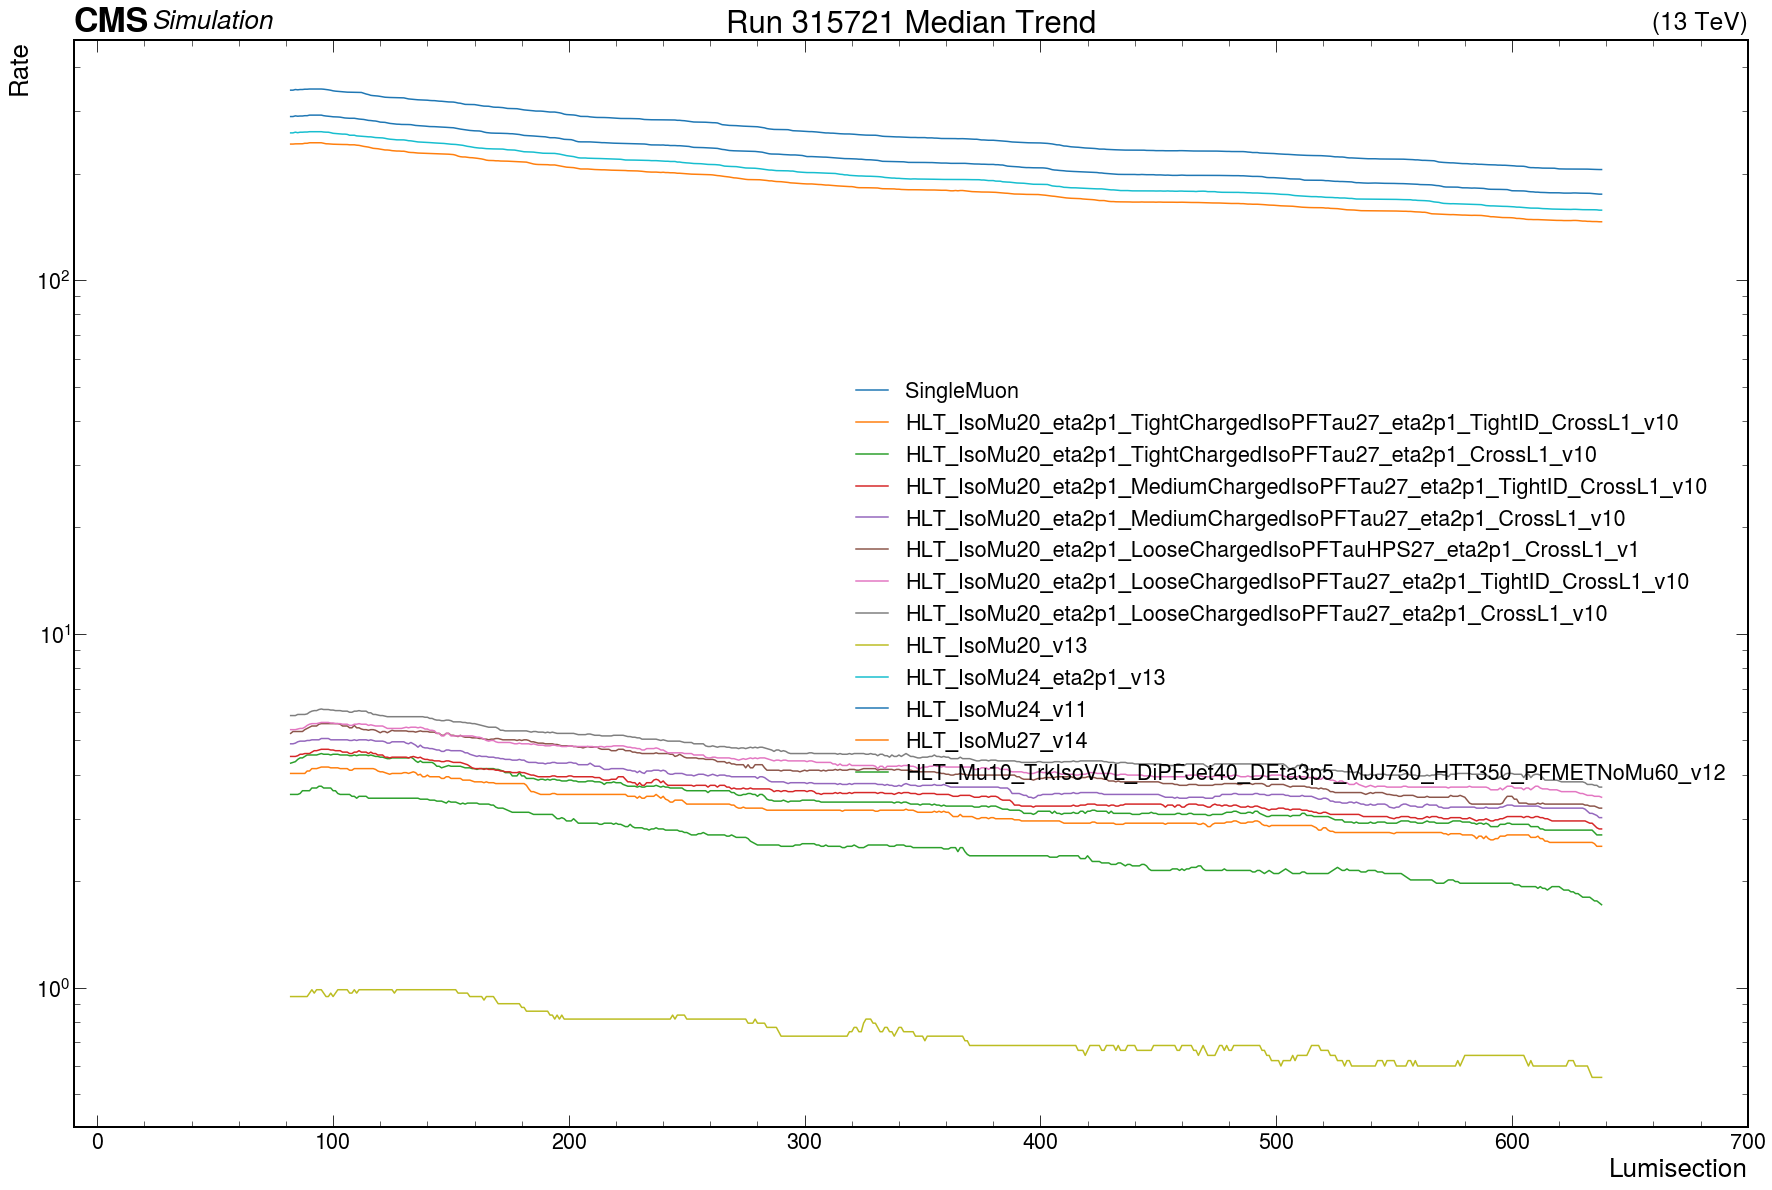

In [15]:
plt.style.use([hep.style.ROOT,hep.style.firamath])
f, ax=plt.subplots(figsize=(30,20))
hep.cms.label(loc=0)
plt.plot(df_singlemuon["attributes.rate"].rolling(window=50).median(),label='SingleMuon')
for i in df_singlemuon_dict.keys():
    plt.plot(df_singlemuon_dict[i]["attributes.rate"].rolling(window=50).median(),label=df_singlemuon_dict[i]['attributes.path_name'][33])
plt.title("Run 315721 Median Trend")
plt.yscale('log')
plt.legend()
plt.xlabel('Lumisection')
plt.ylabel('Rate')
plt.xlim(-10,700)

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodel

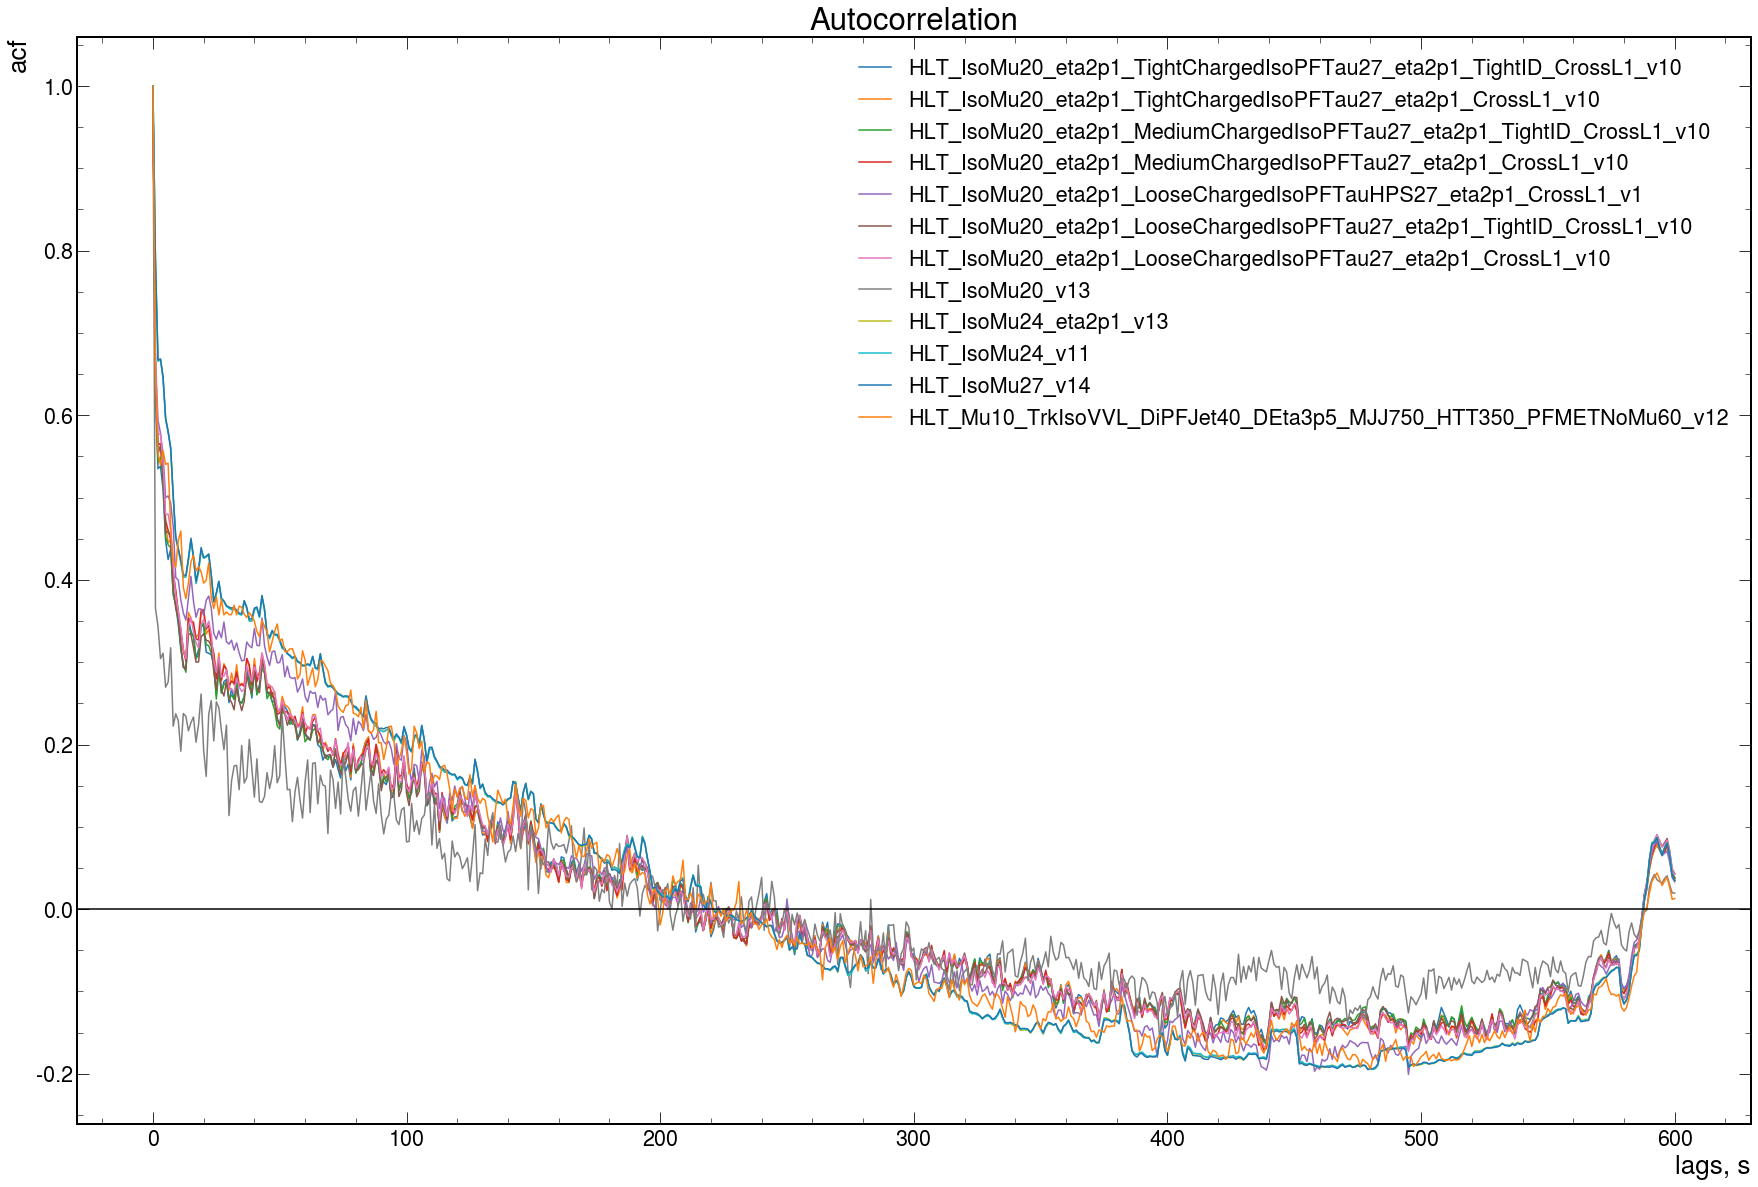

In [16]:
plt.subplots(figsize=(30,20))
#plt.plot(acf(df_singlemuon['attributes.rate'],nlags=600),label=df_singlemuon['attributes.dataset_name'][33])
for i in df_singlemuon_dict.keys():
    plt.plot(acf(df_singlemuon_dict[i]['attributes.rate'],nlags=600),label=df_singlemuon_dict[i]['attributes.path_name'][33])
plt.legend()
plt.title('Autocorrelation')
plt.xlabel('lags, s')
plt.ylabel('acf')
plt.axhline(color='black')

In [17]:
#df_isomu24['acf']=pd.DataFrame(acf(df_isomu24['attributes.rate'],nlags=200))
#plt.plot(df_isomu24['acf'][:100].pct_change())
#plt.axhline(color='black')
#plt.ylim(-.25,.25)

Text(0, 1, 'pacf')

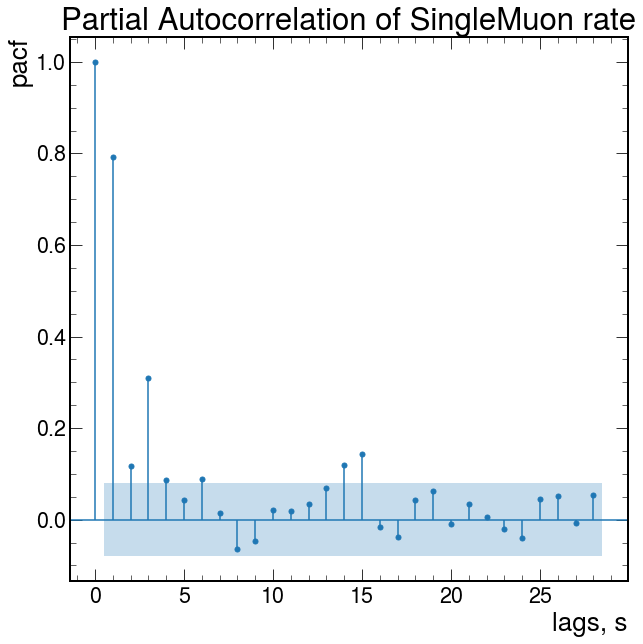

In [18]:
plot_pacf(df_singlemuon['attributes.rate'],label='SingleMuon')
#for i in df_singlemuon_dict.keys():
    #plt.plot(pacf(df_singlemuon_dict[i]['attributes.rate'],nlags=600),label=df_singlemuon_dict[i]['attributes.path_name'][0])
#plot_pacf(df_isomu24['attributes.rate'])
#plt.legend((df_singlemuon['attributes.dataset_name'][0],df_isomu24['attributes.path_name'][0]))
plt.title('Partial Autocorrelation of SingleMuon rate')
plt.xlabel('lags, s')
plt.ylabel('pacf')

## ARIMA Model Fitting
Example
- [Time Seies Analysis using ARIMA FROM Statsmodels](https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/)
- [How to Create an ARIMA Model for Time Series Forecasting in Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

Descriptive Detail
- [Introduction to Regression With ARIMA Errors Model](https://timeseriesreasoning.com/contents/regression-with-arima-errors-model/) --> haven't read yet 
- [Forecasting: Principles and Practice](https://otexts.com/fpp2/)--> Not finished reviewing yet (chap 8)

Library
- [statmodels.tsa.arima_model.ARIMA](https://www.statsmodels.org/v0.10.2/generated/statsmodels.tsa.arima_model.ARIMA.html)


### Expermiment for getting along with the library 

#### Fit Data

In [310]:
model=ARIMA(df_singlemuon['attributes.rate'],(2,1,0))
fit_model=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.93593D+00    |proj g|=  8.23590D-03

At iterate    5    f=  4.93573D+00    |proj g|=  6.35314D-04

At iterate   10    f=  4.93571D+00    |proj g|=  1.24345D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   1.776D-07   4.936D+00
  F =   4.9357118733853769     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
 This problem is unconstrained.


In [259]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.attributes.rate   No. Observations:                  604
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2981.170
Method:                       css-mle   S.D. of innovations             33.665
Date:                Thu, 23 Jun 2022   AIC                           5970.340
Time:                        15:42:22   BIC                           5987.954
Sample:                             1   HQIC                          5977.195
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.3390      0.809     -0.419      0.675      -1.924       1.246
ar.L1.D.attributes.rate    -0.2972      0.038     -7.765      0.000      -0.372      -0.222
ar.L2.D.attributes.rate    -0.3983      0.038    -10.409      0.000      -0.473      -0.323
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3731           -1.5400j            1.5846           -0.2878
AR.2           -0.3731           +1.5400j            1.5846            0.2878
-----------------------------------------------------------------------------
"""

#### Residual from the model

                0
count  604.000000
mean     0.211150
std     33.870074
min   -257.674259
25%     -3.271525
50%      0.623048
75%      4.301106
max    204.228121


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0.5, 0.98, 'Residual Display')

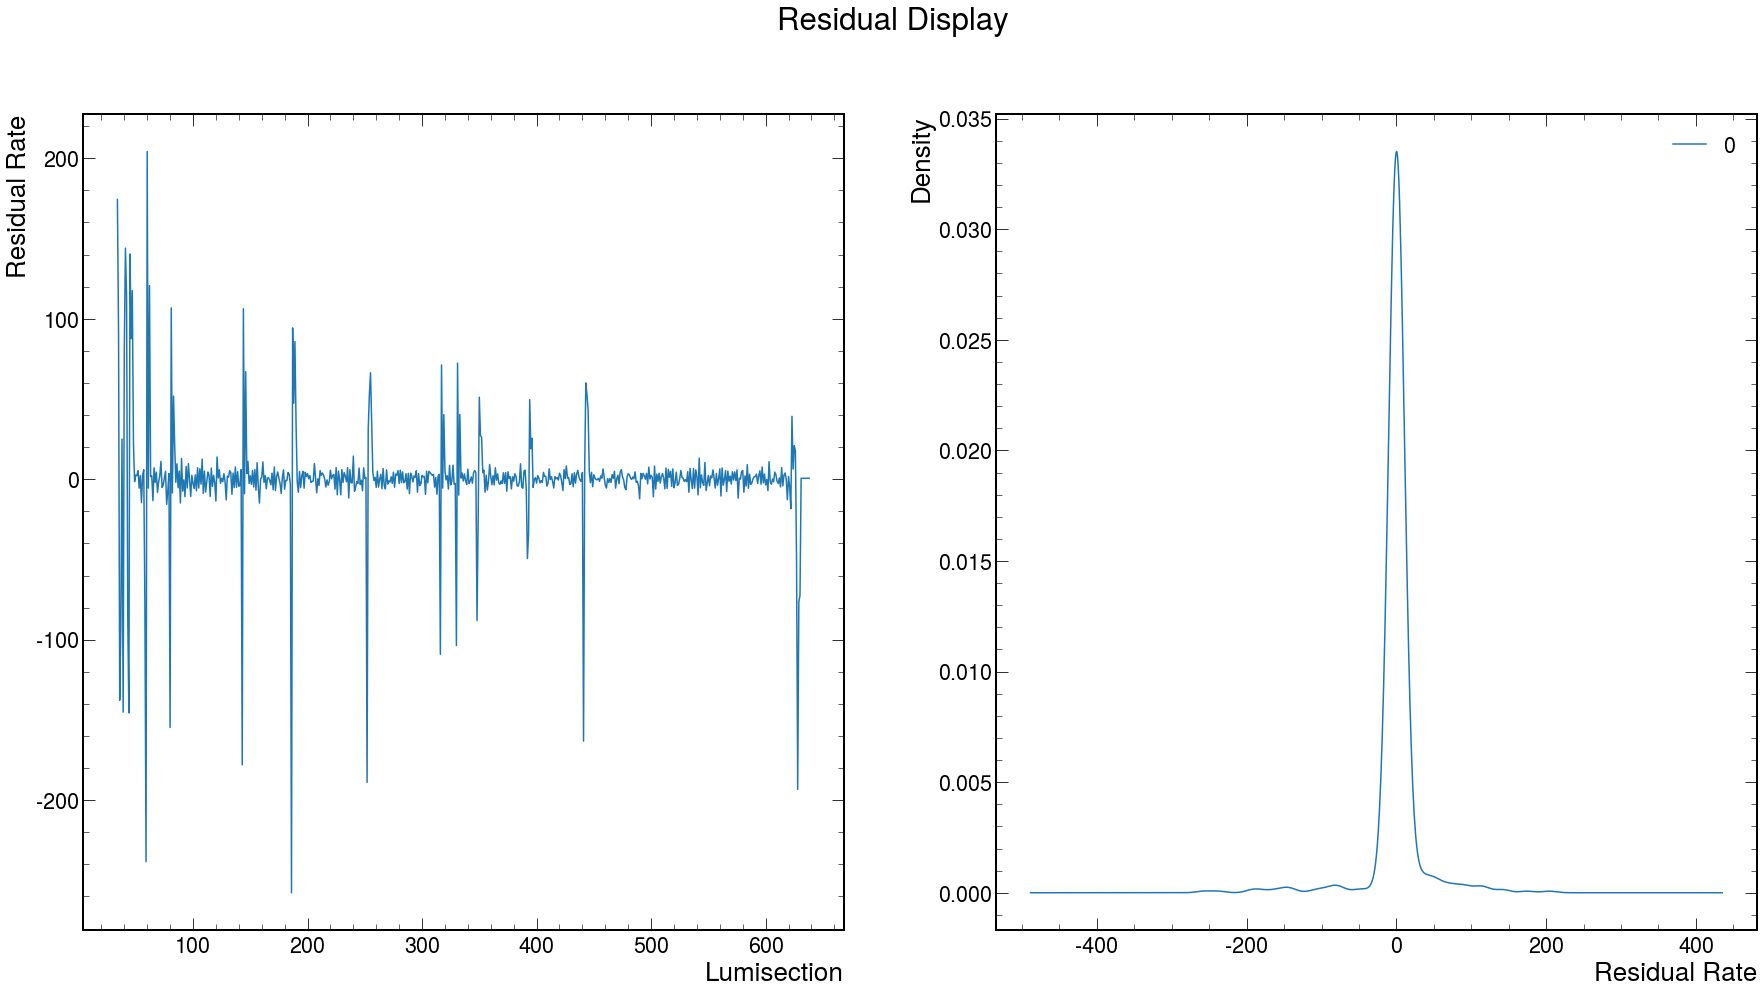

In [299]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
residual=pd.DataFrame(fit_model.resid)
ax1.plot(residual)
ax1.set_xlabel("Lumisection")
ax1.set_ylabel("Residual Rate")
residual.plot(ax=ax2,kind='kde')
print(residual.describe())
ax2.set_xlabel("Residual Rate")
plt.suptitle("Residual Display")

#### Conceptial Proof

Plot
``` trend_data = df_singlemuon['attributes.rate'] - residual ```
against
``` fit_data = fit_model.predict(start,end) ```


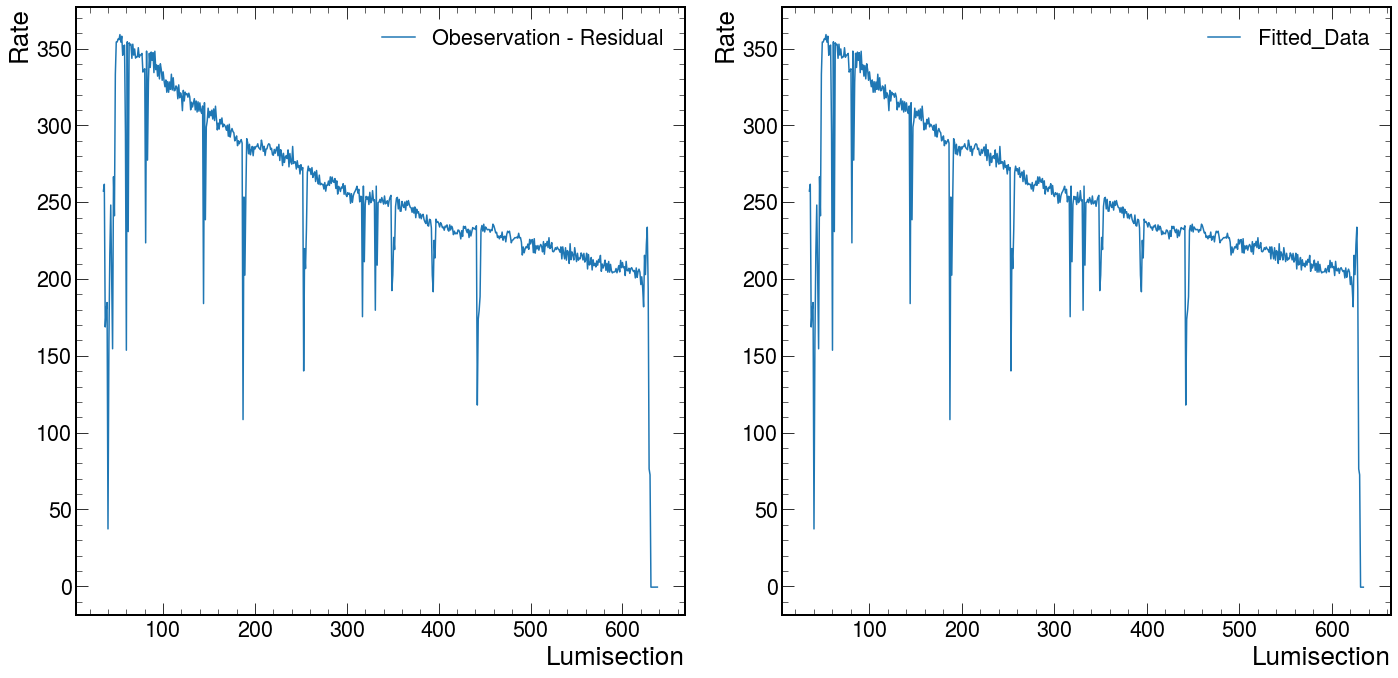

In [306]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
trend_data=df_singlemuon['attributes.rate'][2:638] - residual[0]
ax1.plot(trend_data,label='Obeservation - Residual')
#ax1.plot(df_singlemuon['attributes.rate'],label='observation')
#ax1.axhline(color='black')
#trend_data.plot()
#residual[0].plot()
fit_data=fit_model.predict(start=2,end=600,typ='levels')
ax1.legend()
ax2.plot(fit_data,label='Fitted_Data')
#ax2.axhline(color='black')
ax2.legend()
ax1.set_xlabel("Lumisection")
ax1.set_ylabel("Rate")
ax2.set_xlabel("Lumisection")
ax2.set_ylabel("Rate")
plt.tight_layout()


#plt.xlim(0,700)

Plot 
``` df_singlemuon['attributes.rate']-fit_model.predict(start,end) ``` 
against 
```fit_model.resid```

Text(0, 1, 'Residual Rate')

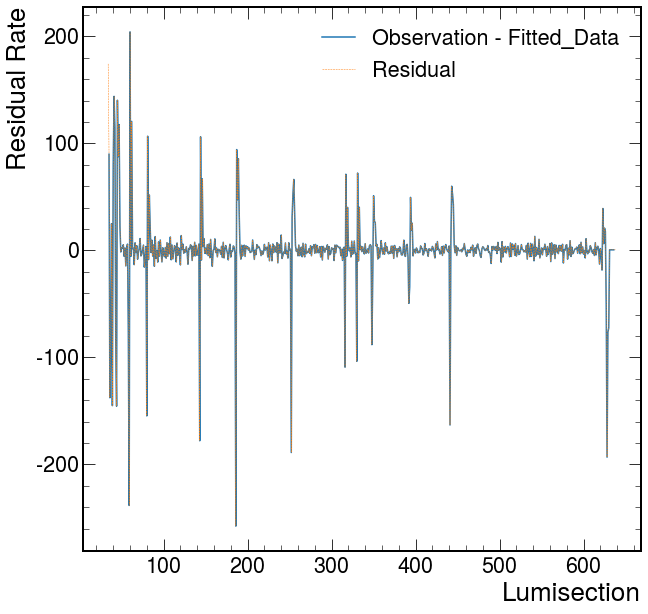

In [297]:
noise_data=(df_singlemuon['attributes.rate']-fit_model.predict(start=2,end=602,typ='levels'))
plt.plot(noise_data,label='Observation - Fitted_Data')
residual=pd.DataFrame(fit_model.resid)
plt.plot(residual,ls='--',lw=0.5,label='Residual')
plt.legend()
plt.xlabel("Lumisection")
plt.ylabel("Residual Rate")

### Play with different orders in ARIMA

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWa

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

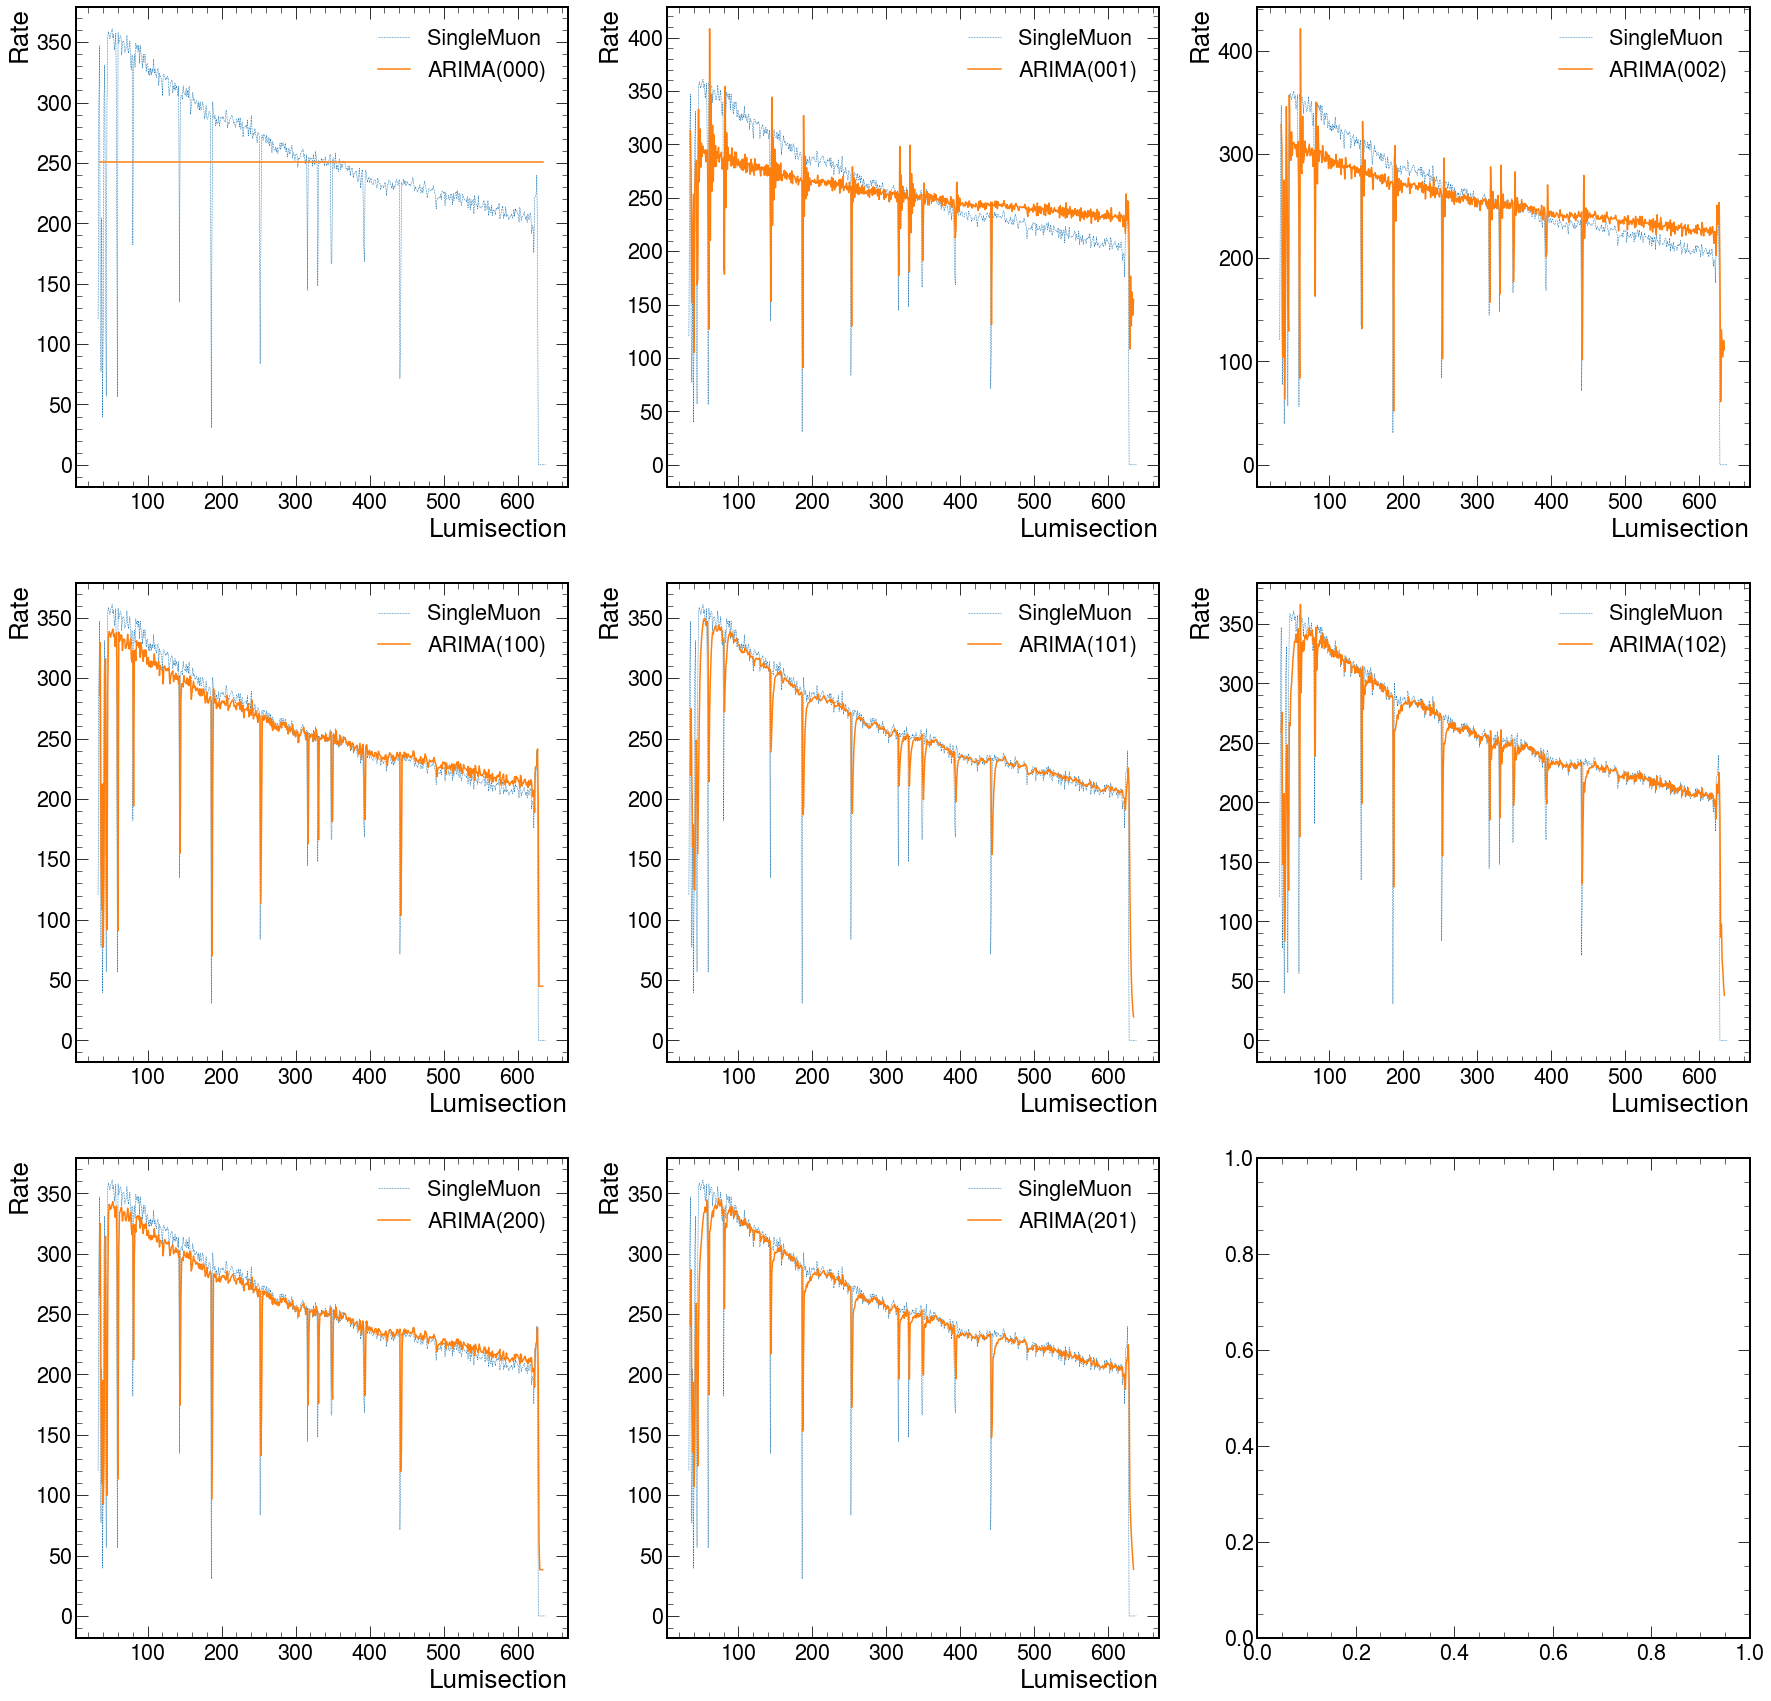

In [322]:
d=0
f,axs=plt.subplots(3,3,figsize=(30,30))
for p in range(3):
    for q in range(3):
        tested_model=ARIMA(df_singlemuon['attributes.rate'],(p,d,q))
        tested_fit_model=tested_model.fit(disp=0)
        #fit_model.summary()
        tested_fitted_data=tested_fit_model.predict(start=2,end=600)
        axs[p,q].plot(df_singlemuon['attributes.rate'],ls='--',lw=0.5,label='SingleMuon')
        axs[p,q].plot(tested_fitted_data,label='ARIMA('+str(p)+str(d)+str(q)+')')
        axs[p,q].legend()
        axs[p,q].set_xlabel("Lumisection")
        axs[p,q].set_ylabel("Rate")

#plt.xlim(0,700)

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWa

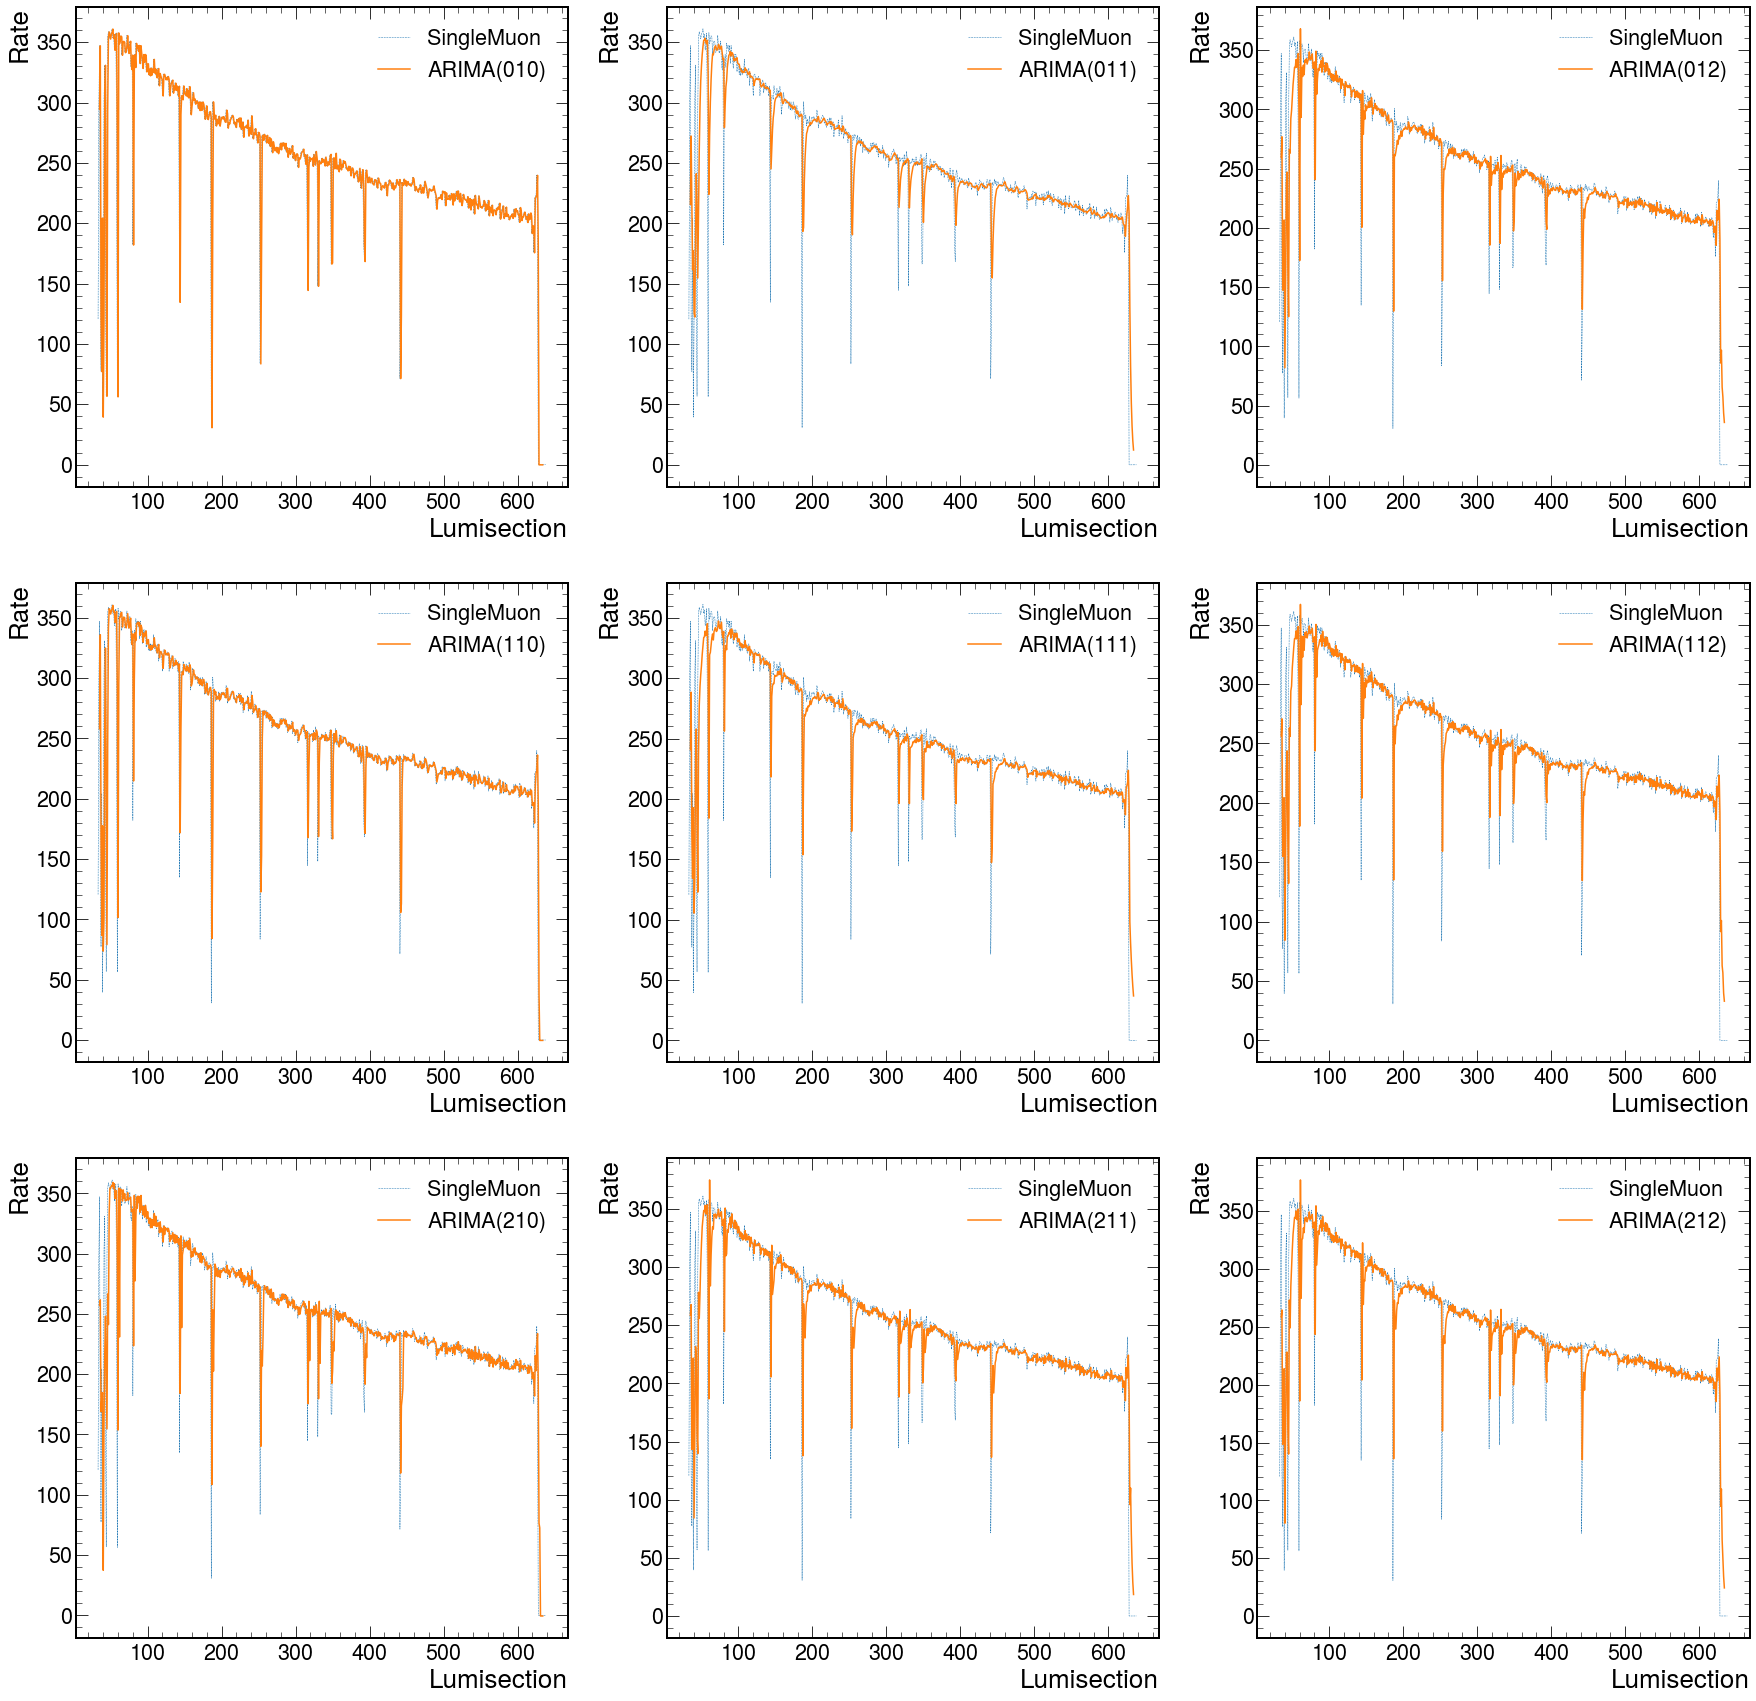

In [320]:
d=1
f,axs=plt.subplots(3,3,figsize=(30,30))
for p in range(3):
    for q in range(3):
        tested_model=ARIMA(df_singlemuon['attributes.rate'],(p,d,q))
        tested_fit_model=tested_model.fit(disp=0)
        #fit_model.summary()
        tested_fitted_data=tested_fit_model.predict(start=2,end=600,typ='levels')
        axs[p,q].plot(df_singlemuon['attributes.rate'],ls='--',lw=0.5,label='SingleMuon')
        axs[p,q].plot(tested_fitted_data,label='ARIMA('+str(p)+str(d)+str(q)+')')
        axs[p,q].legend()
        axs[p,q].set_xlabel("Lumisection")
        axs[p,q].set_ylabel("Rate")

#plt.xlim(0,700)